## 1. Import Required Libraries


In [1]:
# Importing necessary libraries for data processing and visualization

import pandas as pd  # For data manipulation and analysis, especially for working with DataFrames
import numpy as np  # For numerical computations and handling arrays
import seaborn as sns  # For data visualization, providing a high-level interface for drawing attractive graphs
import matplotlib.pyplot as plt  # For plotting and visualizations, a versatile plotting library
import plotly.express as px # Importing Plotly Express for creating interactive visualizations
import time  # Time library, used for handling time-related tasks
import re  # Regular expressions library, used for string manipulation and pattern matching
import os  # Provides functionalities to interact with the operating system, like reading file paths

## 2. Load the Dataset


In [2]:
# Get the current working directory
pwd = os.getcwd()  # Storing the current directory path

pd.set_option("display.max_columns", None)  # Display all columns in the DataFrame
pd.set_option("display.max_rows", None)     # Display all rows in the DataFrame

# Load the uncleaned dataset into a pandas DataFrame
dataset = pd.read_csv(pwd + "/Diwali Sales Data.csv", encoding='ISO-8859-1')  # or 'latin1' # Reading the CSV file into a DataFrame

# Create a copy of the original dataset to work on
df = dataset.copy()  # Making a copy to avoid altering the original data

## 3. Initial Data Inspection
We'll start by inspecting the dataset to understand its structure and content.

In [3]:
# Display 5 random samples from the dataset
df.sample(5)  # Randomly displaying 5 rows to get a glimpse of the data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
5401,1004425,Indulekha,P00156742,F,36-45,36,1,Maharashtra,Western,Hospitality,Tupperware,3,8299.0,NaN,NaN
315,1003311,Neola,P00249842,F,26-35,33,1,Kerala,Southern,IT Sector,Furniture,1,20317.0,NaN,NaN
4445,1005422,Chen,P00161242,F,51-55,55,1,Maharashtra,Western,Food Processing,Decor,3,9829.0,NaN,NaN
3382,1001996,Doug,P00110942,F,36-45,37,0,Madhya Pradesh,Central,Healthcare,Food,3,11828.0,NaN,NaN
9702,1001298,Siddharth,P00106642,F,36-45,36,0,Gujarat,Western,Govt,Food,3,3795.0,NaN,NaN


In [4]:
# Display the first 5 rows of the dataset
df.head()  # Showing the first few rows of the DataFrame

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# Display the last 5 rows of the dataset
df.tail()  # Showing the last few rows of the DataFrame

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [6]:
# Show the shape of the dataset (number of rows and columns)
df.shape  # Getting the dimensions of the DataFrame

(11251, 15)

In [7]:
# Show the basic information (data types, non-null counts, etc.) of the dataset
df.info()  # Displaying information about the DataFrame's structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# Show the number of missing values for each column
df.isnull().sum()  # Counting missing values in each column

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [9]:
df.isnull().sum() / df.shape[0] * 100  # Calculate the percentage of missing values in each column

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [10]:
# Show the number of duplicate rows in the dataset
df.duplicated().sum()  # Checking for duplicate entries

np.int64(8)

In [11]:
# Drop duplicate rows, if any, to avoid redundancy
df = df.drop_duplicates()  # Removing any duplicate records

In [12]:
# Display the number of rows and columns in the DataFrame
df.shape

(11243, 15)

In [13]:
# Drop the 'Status' and 'unnamed1' columns from the DataFrame
df = df.drop(columns=["Status", "unnamed1"], axis=1)  # Dropping unnecessary columns

In [14]:
# Remove rows with missing values from the DataFrame
df = df.dropna()  # Removing rows with missing data

In [15]:
# Show the number of missing values for each column
df.isna().sum()  # Counting missing values in each column

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
# Convert the 'Amount' column to integer type
df["Amount"] = df["Amount"].astype(int)  # Changing 'Amount' data type to integer

## 4. Summary Statistics

Let's inspect summary statistics for both numeric and categorical columns.


In [17]:
# Loop through all object type columns and display their value counts
# for i in df.select_dtypes(include="object").columns:  # Iterating over object columns
#     print(f"Value Counts for {i}:\n", df[i].value_counts())  # Displaying counts of unique values in each column
#     print("***" * 10)  # Separator for clarity

In [18]:
# Display summary statistics for object (categorical) columns
df.describe(include="object")  # Summary statistics for categorical variables

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11231,11231,11231,11231,11231,11231,11231,11231
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7828,4536,1942,4287,1581,2653


In [19]:
# Display summary statistics for numerical columns
df.describe(include="number")  # Summary statistics for numerical columns

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## 5. Exploratory Data Analysis (EDA)

Let's continue with the Exploratory Data Analysis (EDA) to gain deeper insights into the dataset.

### 5.1 Gender Distribution
We start by examining the distribution of gender in the dataset.

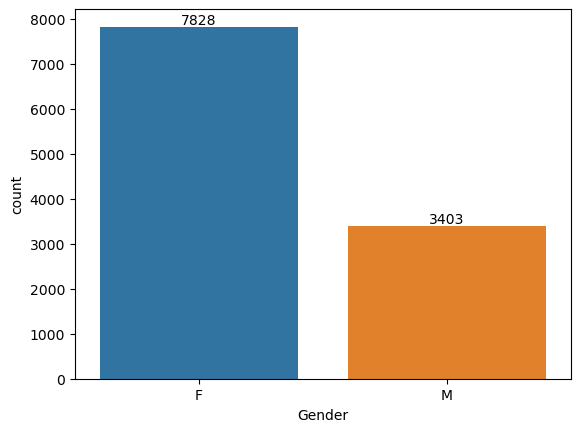

In [20]:
# Plot the distribution of gender in the dataset
ax = sns.countplot(x="Gender", hue= "Gender" ,data=df)  # Countplot for 'Gender' column
for bars in ax.containers:
    ax.bar_label(bars)  # Add labels to each bar
plt.show()

### 5.2 Total Amount by Gender
Next, we visualize the total amount spent by each gender.

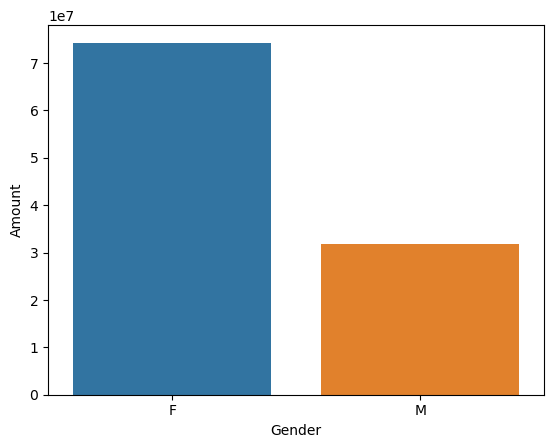

In [21]:
# Group data by 'Gender' and calculate the total amount spent
gender_amount_data = df.groupby(["Gender"])["Amount"].sum().reset_index()

# Create a barplot showing the total amount spent by each gender
sns.barplot(x="Gender", y="Amount", hue="Gender", data=gender_amount_data)  # Barplot for total amount by gender
plt.show()


### 5.3 Age Group and Gender Distribution
We explore the distribution of different age groups, segmented by gender.

In [22]:
Age_Group_counts = df["Age Group"].value_counts() # Counting the number of occurrences for each age group in the dataset

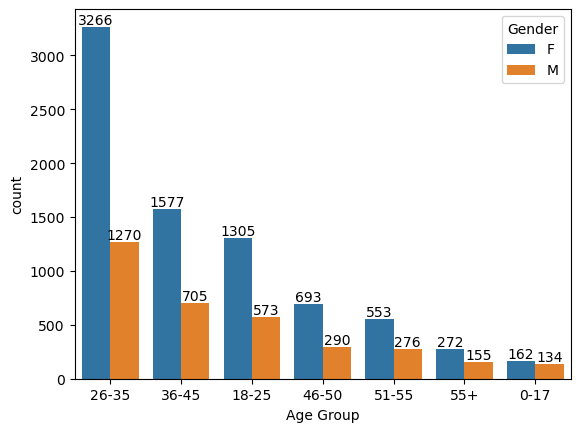

In [23]:
# Plot the distribution of age groups with respect to gender
ax1 = sns.countplot(x="Age Group", hue="Gender", data=df, order=Age_Group_counts.index)  # Countplot for 'Age Group' with 'Gender' hue
for bars in ax1.containers:
    ax1.bar_label(bars)  # Add labels to each bar
plt.show()

### 5.4 Total Amount by Age Group
This plot shows the total amount spent by each age group, sorted in descending order.

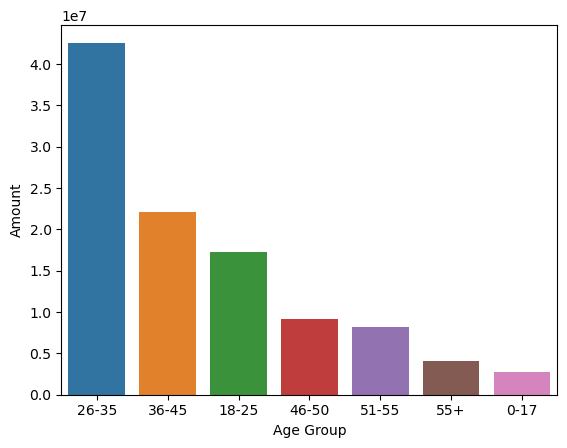

In [24]:
# Group data by 'Age Group' and calculate the total amount spent, then sort by amount in descending order
age_group_amount_data = df.groupby(["Age Group"])["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False)

# Create a barplot showing the total amount spent by each age group
sns.barplot(x="Age Group", y="Amount", hue="Age Group", data=age_group_amount_data)  # Barplot for total amount by age group
plt.show()

### 5.5 Percentage of Total Amount by Age Group
We'll annotate the total amount spent by each age group with percentages of the total.

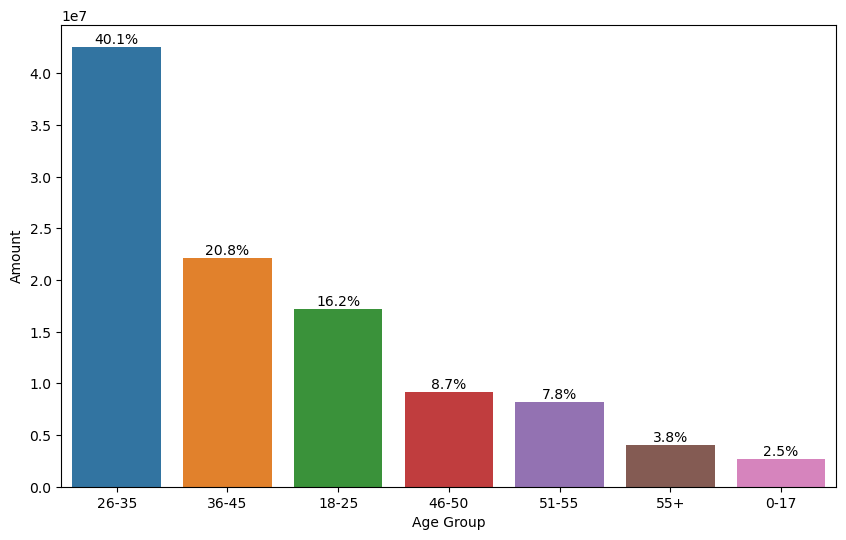

In [25]:
# Create a barplot showing the total amount spent by each age group
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x="Age Group", y="Amount", hue="Age Group", data=age_group_amount_data)

# Calculate the total amount spent
total = sum(age_group_amount_data["Amount"])

# Annotate each bar with the percentage of total amount
for i, v in enumerate(age_group_amount_data["Amount"]):
    percentage = v / total * 100  # Calculate percentage
    ax2.text(i, v + 0.5, f'{percentage:.1f}%', ha="center", va="bottom")  # Add percentage label to each bar
plt.show()

### 5.6 Top 10 States by Orders
Next, we analyze the top 10 states based on the total number of orders.

In [26]:
# Group data by 'State' and calculate the total number of orders, then sort by orders in descending order
state_orders = df.groupby(["State"])["Orders"].sum().reset_index().sort_values(by="Orders", ascending=False).head(10)

# Display the top 10 states with their total orders
state_orders

,State,Orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1063


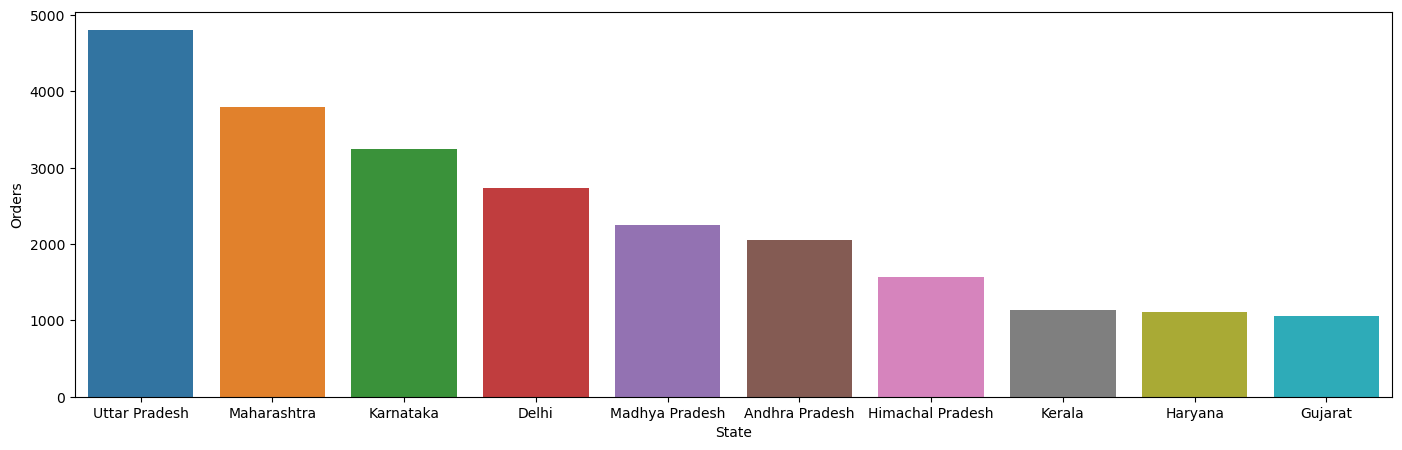

In [27]:
# Create a barplot showing the total number of orders by state
plt.figure(figsize=(17, 5))
sns.barplot(x="State", y="Orders", hue="State", data=state_orders)  # Barplot for orders by state
plt.show()

### 5.7 Marital Status Distribution
We will examine the distribution of marital status in the dataset.

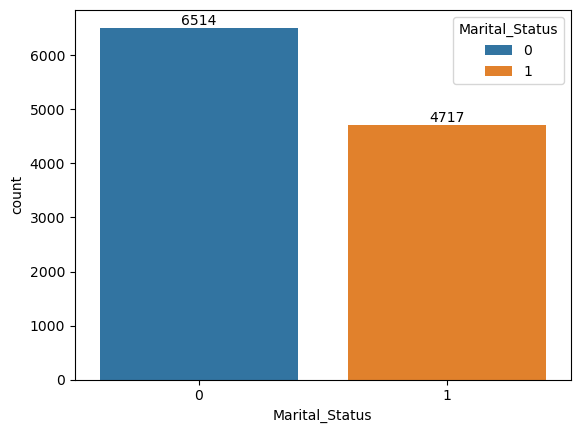

In [28]:
# Plot the distribution of marital status in the dataset
ax3 = sns.countplot(data=df, x="Marital_Status", hue="Marital_Status")  # Countplot for 'Marital_Status'
for bars in ax3.containers:
    ax3.bar_label(bars)  # Add labels to each bar
plt.show()

### 5.8 Total Amount by Marital Status and Gender
We explore the total amount spent segmented by marital status and gender.

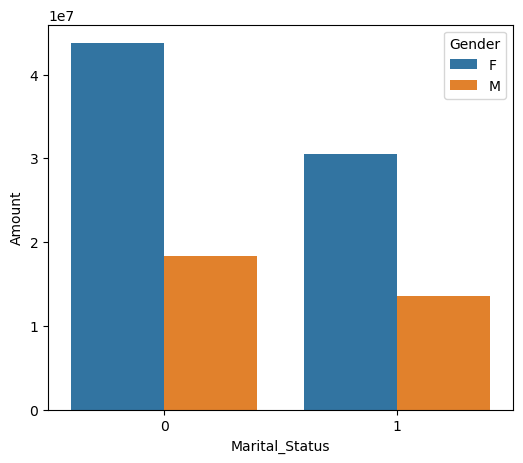

In [29]:
# Group data by 'Marital_Status' and 'Gender', then calculate the total amount spent
Marital_Gender_amount_data = df.groupby(["Marital_Status", "Gender"])["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False)

# Create a barplot showing the total amount spent by marital status and gender
plt.figure(figsize=(6, 5))
sns.barplot(data=Marital_Gender_amount_data, x="Marital_Status", y="Amount", hue="Gender")  # Barplot for amount by marital status and gender
plt.show()

### 5.9 Occupation Distribution
Next, we analyze the distribution of occupations in the dataset.

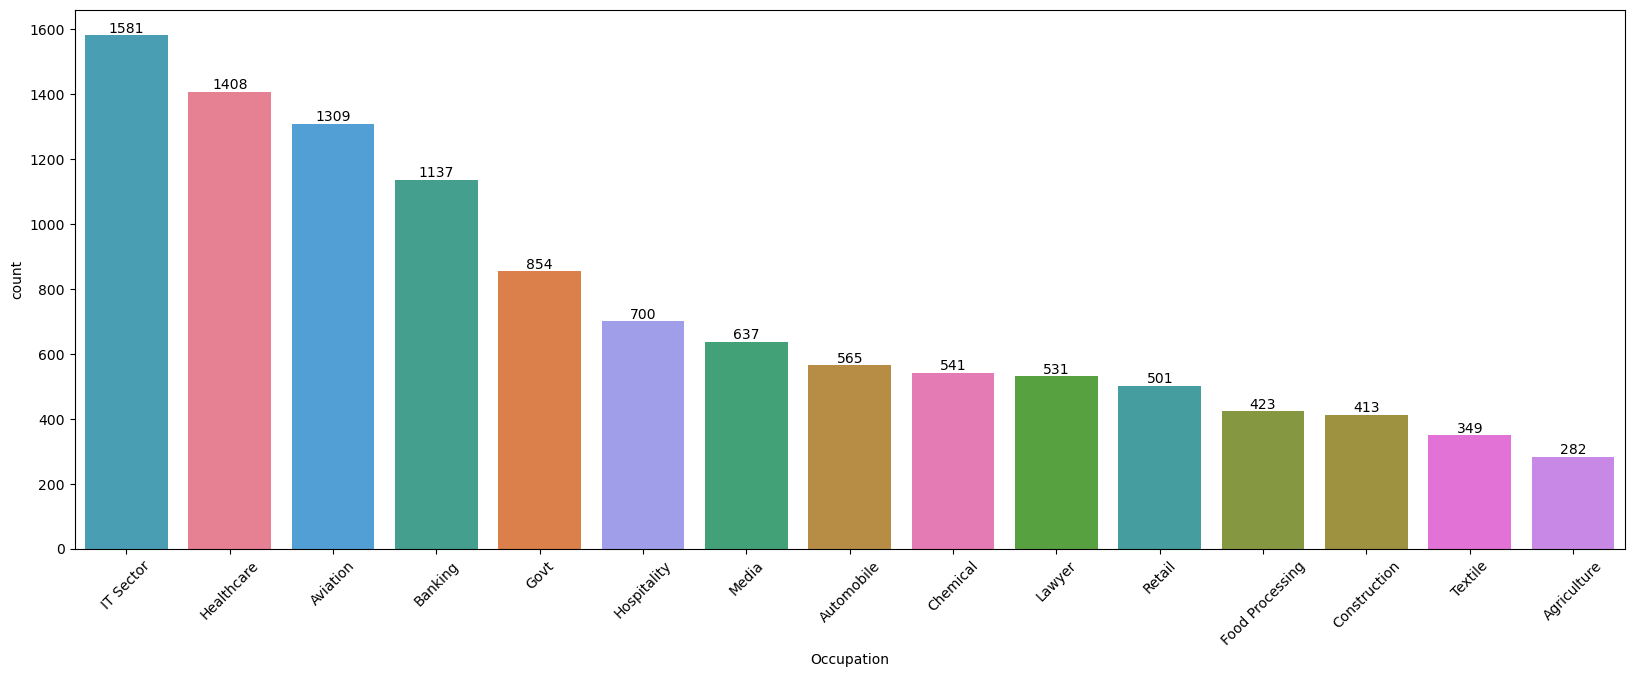

In [30]:
# Count the number of occurrences for each occupation
occupation_counts = df["Occupation"].value_counts()

# Create a countplot for occupations
plt.figure(figsize=(20, 7))
ax4 = sns.countplot(data=df, x="Occupation", hue="Occupation", order=occupation_counts.index)  # Countplot for 'Occupation'
for bars in ax4.containers:
    ax4.bar_label(bars)  # Add labels to each bar
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 5.10 Total Amount by Occupation
We will visualize the total amount spent by each occupation.

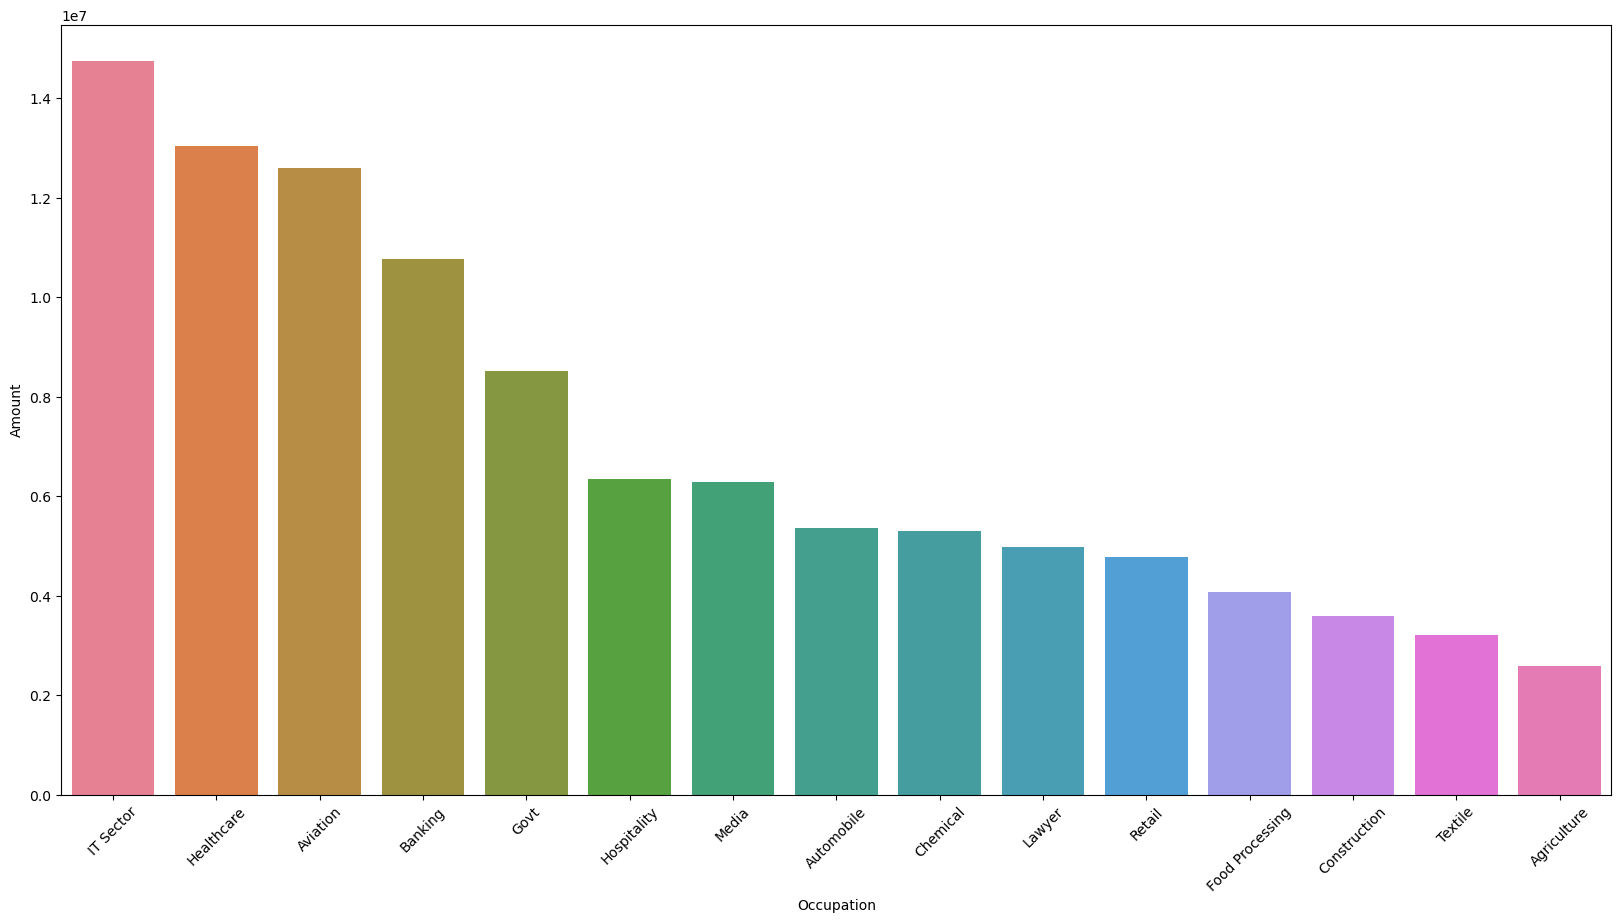

In [31]:
# Group data by 'Occupation' and calculate the total amount spent, then sort by amount in descending order
occupation_amount_data = df.groupby("Occupation")["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False)

# Create a barplot showing the total amount spent by each occupation
plt.figure(figsize=(20, 10))
sns.barplot(data=occupation_amount_data, x="Occupation", y="Amount", hue="Occupation")  # Barplot for total amount by occupation
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 5.11 Product Category Distribution
Next, we will analyze the distribution of product categories.

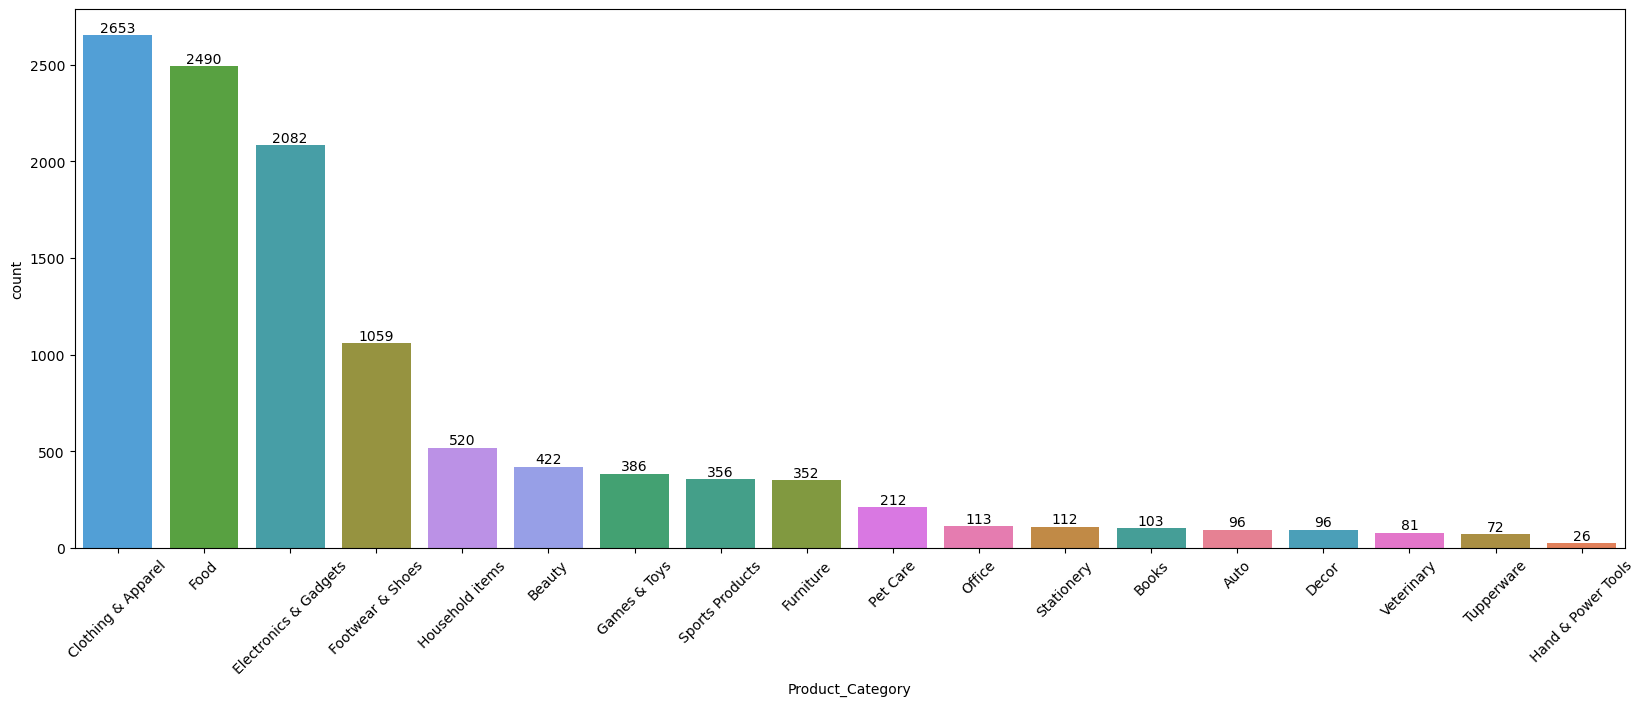

In [32]:
# Count the number of occurrences for each product category
Product_Category_counts = df["Product_Category"].value_counts()

# Create a countplot for product categories
plt.figure(figsize=(20, 7))
ax5 = sns.countplot(data=df, x="Product_Category", hue="Product_Category", order=Product_Category_counts.index)  # Countplot for 'Product_Category'
for bars in ax5.containers:
    ax5.bar_label(bars)  # Add labels to each bar
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 5.12 Total Amount by Product Category
We will visualize the total amount spent by each product category.

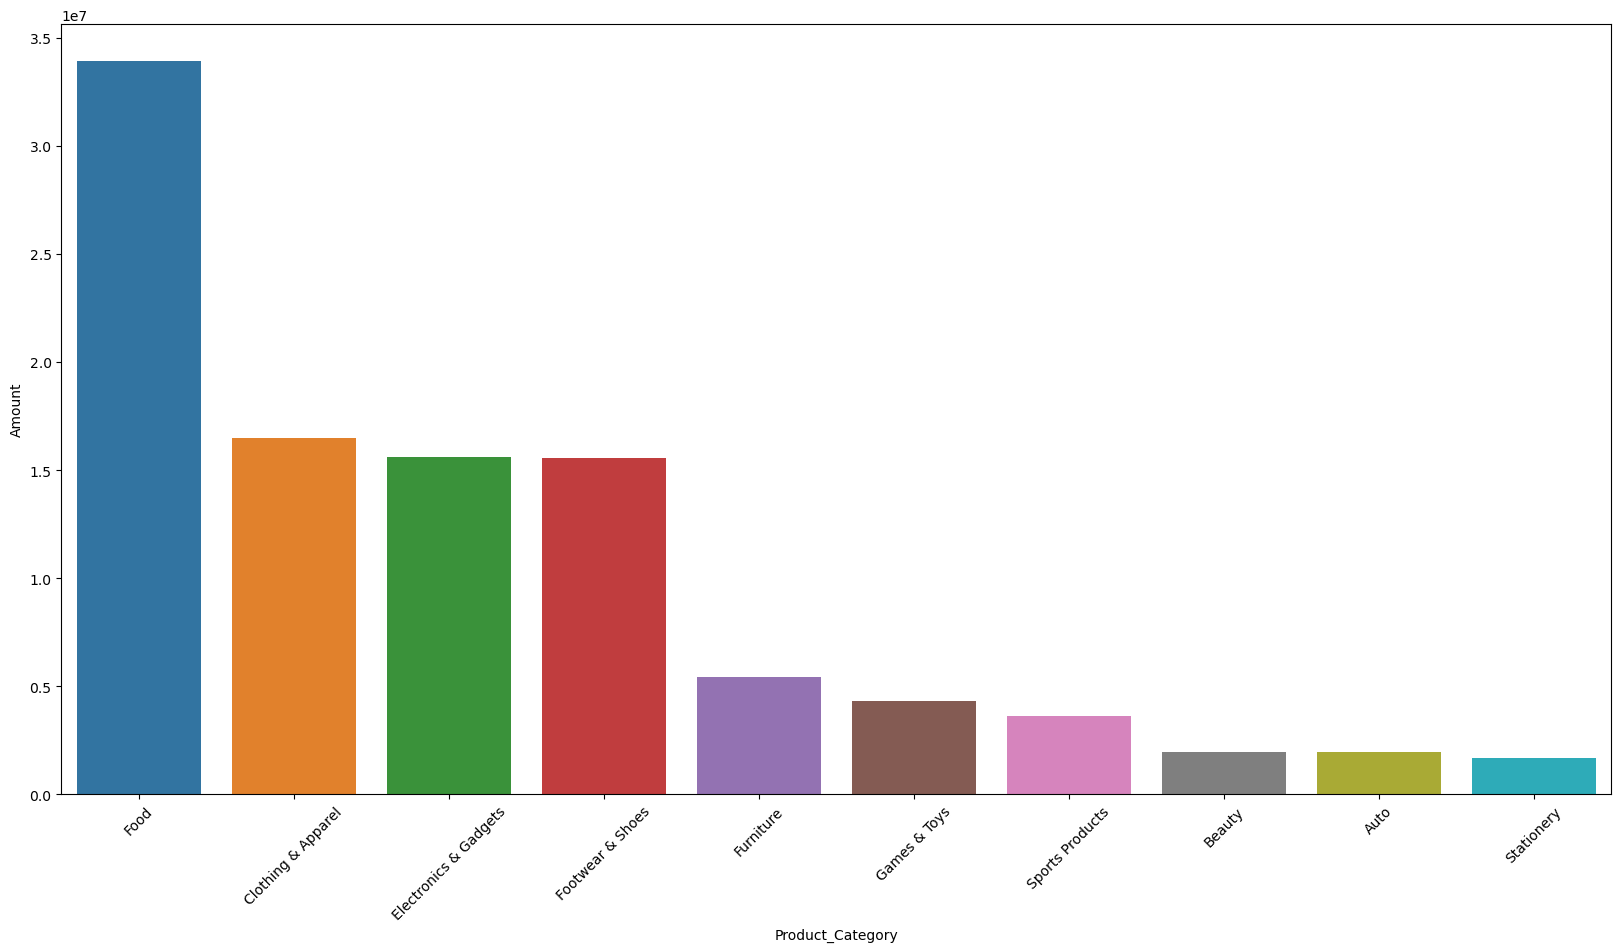

In [33]:
# Group data by 'Product_Category' and calculate the total amount spent, then sort by amount in descending order
Product_Category_amount_data = df.groupby("Product_Category")["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False).head(10)

# Create a barplot showing the total amount spent by each product category
plt.figure(figsize=(20, 10))
sns.barplot(data=Product_Category_amount_data, x="Product_Category", y="Amount", hue="Product_Category")  # Barplot for total amount by product category
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 5.13 Top 10 Product IDs by Orders
Finally, we will examine the top 10 product IDs based on the number of orders.

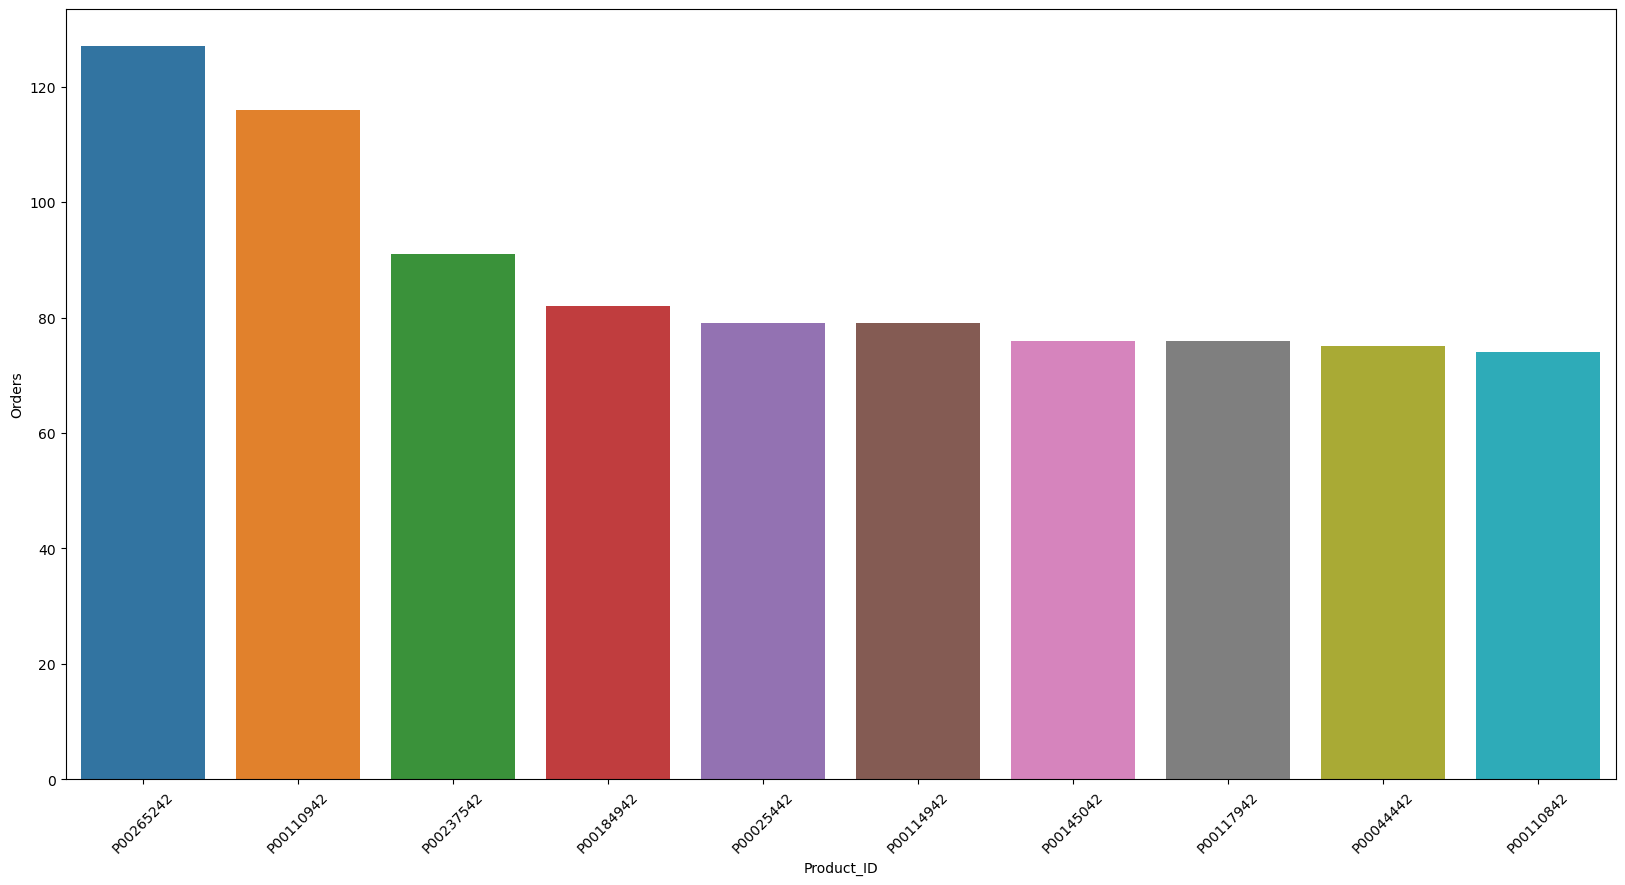

In [34]:
# Group data by 'Product_ID' and calculate the total number of orders, then sort by orders in descending order
Product_ID_orders_data = df.groupby("Product_ID")["Orders"].sum().reset_index().sort_values(by="Orders", ascending=False).head(10)

# Create a barplot showing the total number of orders for the top 10 product IDs
plt.figure(figsize=(20, 10))
sns.barplot(data=Product_ID_orders_data, x="Product_ID", y="Orders", hue="Product_ID")  # Barplot for orders by product ID
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()